In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

Webscrape the data from forbes list

In [3]:
#the original data is brought to the page using a javascript list so that cannot be read directly 
#so open the url, inspect the element and then copy the table to a html file and then read from it 

url = 'https://www.forbes.com/athletes/list/3/#tab:overall'
my_url = 'C:\\Users\\Manjit\\Desktop\\Masters\\1.Self-Courses\\EDA\\athletes-data.html'
data_html = soup(open(my_url), "html.parser")

#reading from the url directly
#uClient = uReq(my_url2)
#page_html = uClient.read()
#uClient.close()
#page_soup = soup(page_html, "html.parser")

In [4]:
#build a dataframe from the data

tables = data_html.findChildren('table')
my_table = tables[0] #there could be many tables so get the right one 

table_rows = my_table.find_all('tr') #get all the rows
pd_table = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    if len(row) == 7:
        pd_table.append(row)


In [5]:
#create a dataframe

data_df = pd.DataFrame(pd_table)
data_df.drop([0,1], axis=1, inplace=True)
data_df.columns = ['Name', 'Pay','Salary/Winnings','Endorsements','Sport']
data_df.head()

,Name,Pay,Salary/Winnings,Endorsements,Sport
0,Roger Federer,$106.3 M,$6.3 M,$100 M,Tennis
1,Cristiano Ronaldo,$105 M,$60 M,$45 M,Soccer
2,Lionel Messi,$104 M,$72 M,$32 M,Soccer
3,Neymar,$95.5 M,$70.5 M,$25 M,Soccer
4,LeBron James,$88.2 M,$28.2 M,$60 M,Basketball


In [6]:
#write a function to convert the string values to float

def _remove_m(column):
    column = column.split(' ')[0][1:]
    return float(column)

In [9]:
#convert the string values to float

string_columns = ['Pay','Salary/Winnings','Endorsements']
for column in string_columns:
    data_df[column] = data_df[column].apply(lambda x:_remove_m(x))
    
data_df.head()

,Name,Pay,Salary/Winnings,Endorsements,Sport
0,Roger Federer,106.3,6.3,100.0,Tennis
1,Cristiano Ronaldo,105.0,60.0,45.0,Soccer
2,Lionel Messi,104.0,72.0,32.0,Soccer
3,Neymar,95.5,70.5,25.0,Soccer
4,LeBron James,88.2,28.2,60.0,Basketball


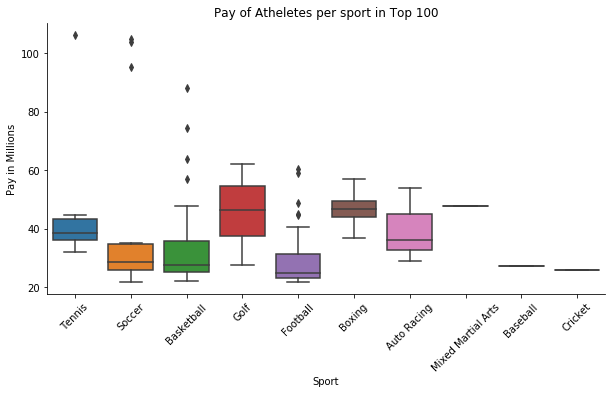

In [10]:
#Pay versus the sport 

plt.figure(figsize=(10,5))
sns.boxplot(x="Sport", y="Pay", data=data_df).set_title("Pay of Atheletes per sport in Top 100")
plt.xticks(rotation=45)
plt.ylabel("Pay in Millions")
sns.despine()

#here we see that the median of boxing is the highest

In [11]:
data_df.Sport.value_counts()

Basketball            35
Football              31
Soccer                14
Tennis                 6
Golf                   4
Boxing                 4
Auto Racing            3
Cricket                1
Mixed Martial Arts     1
Baseball               1
Name: Sport, dtype: int64

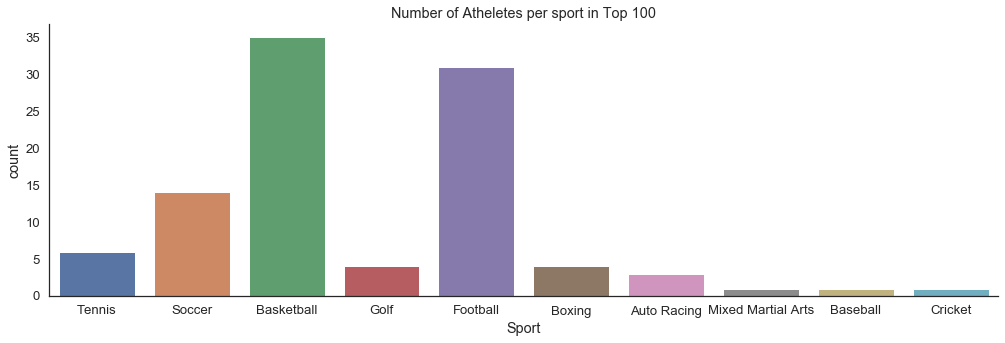

In [12]:
plt.figure(figsize=(17,5))
sns.set(style="white", font_scale=1.2)
sns.countplot(x="Sport", data=data_df).set_title("Number of Atheletes per sport in Top 100")
sns.despine()


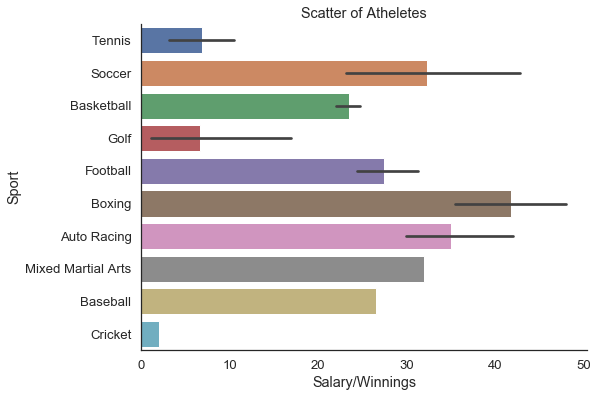

In [13]:
#boxing has higher salaries 

plt.figure(figsize=(8,6))
sns.barplot(y="Sport",x="Salary/Winnings" ,data=data_df).set_title("Scatter of Atheletes")
sns.despine()

In [224]:
#enhance the data further with more scraping 
#get age data from wikipedia 
import re

def _get_data(url, parameter):
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html, "html.parser")
    table = page_soup.find('table', { 'class' : 'infobox vcard' })
    table_rows = table.find_all('tr')
    
    birth_year = 0
    age = ''
    for row in table_rows:
        td = row.find_all('td')
        for i in td:
            if (i.text.find(parameter) >0):
                string = i.text
                #birth_year = re.match(r'.*(....-..-..).*', string).group(1)
                search_string = r'.*('+parameter+' ..).*'                
                age = re.match(r'.*(... dd).*', string).group(1)
    return [age, birth_year]
_get_data('https://en.wikipedia.org/wiki/Roger_Federer','age')

AttributeError: 'NoneType' object has no attribute 'group'

In [186]:


wiki_url = 'https://en.wikipedia.org/wiki/'
player_names = data_df.Name.values
Age = []
for player in player_names:
    player = player.split(" ")
    player = "_".join(player)
    wiki_url_p = wiki_url+player
    

array(['Roger Federer', 'Cristiano Ronaldo', 'Lionel Messi', 'Neymar',
       'LeBron James', 'Stephen Curry', 'Kevin Durant', 'Tiger Woods',
       'Kirk Cousins', 'Carson Wentz', 'Tyson Fury', 'Russell Westbrook',
       'Lewis Hamilton', 'Rory McIlroy', 'Jared Goff', 'Conor McGregor',
       'James Harden', 'Giannis Antetokounmpo', 'Anthony Joshua',
       'Deontay Wilder', 'Tom Brady', 'Drew Brees', 'Novak Djokovic',
       'Kyrie Irving', 'Phil Mickelson', 'Julio Jones', 'Rafael Nadal',
       'Klay Thompson', 'Naomi Osaka', 'Canelo Alvarez', 'Damian Lillard',
       'Sebastian Vettel', 'Serena Williams', 'Mohamed Salah',
       'Chris Paul', 'Kylian Mbappe', 'Grady Jarrett', 'Paul George',
       'Michael Thomas', 'Kei Nishikori', 'Blake Griffin', 'John Wall',
       'Kawhi Leonard', 'Anthony Davis', 'Aaron Rodgers',
       'Andres Iniesta', 'Matt Ryan', 'Daniel Ricciardo', 'Mesut Ozil',
       'Kyle Lowry', 'Paul Pogba', 'Jimmy Butler', 'Gordon Hayward',
       'Jordan Spieth', 

In [2]:
output_notebook()

Loading BokehJS ...

In [19]:
type(data_df.Sport.values)

numpy.ndarray

In [16]:
x = [1, 3, 5, 7]
y = [2, 4, 6, 8]

p = figure(title='Enodrsements in Sports', x_axis_label="Sport", y_axis_label="Endorsements in million")
p.line(x,y)
show(p)